In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

In [2]:
Adj(1e-9,45,100000)

(144, 1296000000)

# 100nano

3 times appart

In [3]:
modulation = 93 #Hz
loop_number = 8000    
res = 1/2972160000

sam, sr , segment_length = Adj9(res,modulation,loop_number)

In [4]:
sam

2016

In [5]:
sr

2999808000

In [6]:
interval = segment_length*1e9 #nano
interval

672.0430107526881

# AWG and Pulse files setup

In [7]:
AWG_Settings_100nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':150,
    'Clock Sample Frecuency':2999808000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\60,30\pos\100nano'
}

In [8]:
M8190A = VisaR(AWG_Settings_100nano,60000)

In [10]:
M8190A.write('FREQ:RAST {a}'.format(a = sr))

21

In [9]:
Initialization(M8190A,AWG_Settings_100nano)

Instruments Sampling Frecuency set to 2.99980800000000E+09Hz
Instruments Direct Out DC Output route Voltage set to 6.75000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [11]:
Pump_100nano = {
    'Name':'Pump_100nano',
    'Amplitude': 2*60,
    'Start time':300,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [12]:
ProbeA_100nano = {
    'Name':'ProbeA_100nano',
    'Amplitude':2*30,
    'Start time':100,
    'End time':500,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [13]:
ProbeB_100nano= {
    'Name':'ProbeB_100nano',
    'Amplitude':-2*30,
    'Start time':100,
    'End time':500,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [14]:
PulseScheme_A_100nano =  {
    'Name' : 'PulseScheme_A_100nano',
    'Pulse Scheme': [Pump_100nano,ProbeA_100nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\pos\100nano'
}

In [15]:
PulseScheme_B_100nano =  {
    'Name' : 'PulseScheme_B_100nano',
    'Pulse Scheme': [Pump_100nano,ProbeB_100nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\pos\100nano'
}

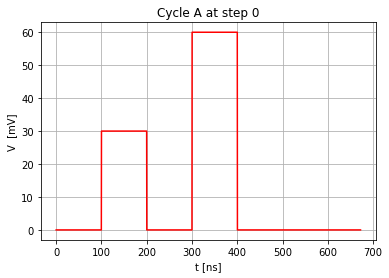

In [16]:
step = 0
pul1 = Sweep_teil(PulseScheme_A_100nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100 nano 93 Hz mod ,{a} step.jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'], a = step),bbox_inches='tight')

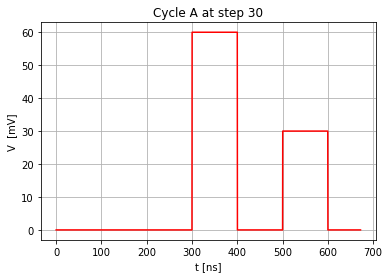

In [17]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_100nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 100 nano 93 Hz mod ,{a} step.jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'], a = step),bbox_inches='tight')

In [36]:
interval

672.0430107526881

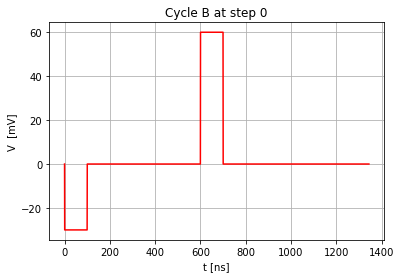

In [113]:
step = 0
pul1 = Sweep_teil(PulseScheme_B_100nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 100 nano 93 Hz mod {a} step.jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'], a = step),bbox_inches='tight')

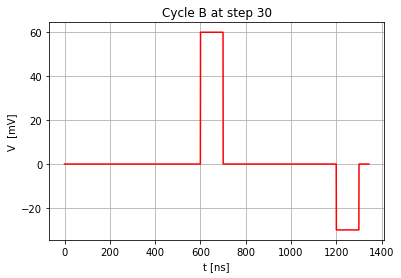

In [114]:
step = 30
pul1 = Sweep_teil(PulseScheme_B_100nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 100 nano93 Hz mod {a} step.jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'], a = step),bbox_inches='tight')

In [18]:
sweeping_run_a_100nano = Sweeping_Single_List_File_teil(PulseScheme_A_100nano,30,interval,sam,0,30,AWG_Settings_100nano,'A')[0]

In [19]:
sweeping_run_b_100nano = Sweeping_Single_List_File_teil(PulseScheme_B_100nano,30,interval,sam,0,30,AWG_Settings_100nano,'B')[0]

In [20]:
#Exporting pickle

with open(r"{dict}\cycleA_71steps_93Hz_100nano_.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_100nano, k)


with open(r"{dict}\cycleB_71steps_93Hz_100nano_.p".format(dict = PulseScheme_B_100nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100nano, h)

In [17]:
#Importing Pickle

with open(r"{dict}\cycleA_71steps_93Hz_100nano_.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as j:
    sweeping_runa_100nano = pickle.load(j)

with open(r"{dict}\cycleB_71steps_93Hz_100nano_.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as f:
    sweeping_runb_100nano= pickle.load(f)

In [20]:
sweeping_run_a_100nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\60,30\\pos\\100nano\\SegmentA_2016_30.csv'

In [ ]:
sweeping_run_b_100nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [21]:
loop_number

8000

In [19]:
Sequence_File(M8190A,sweeping_runa_100nano['Pulse File Location, at step 70'],sweeping_runb_100nano['Pulse File Location, at step 70'],8000)

Sequence loaded with the following segment data "1,8000,0,1,0,2015,2,8000,0,1,0,2015" and the advancement method is COND


2

# Loading

In [24]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [22]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '50 miliVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '93Hz'
}

In [23]:
loop_number

8000

In [124]:
loop_number

4000

In [25]:
playingtime = 7

data, averaged_data = Voltage_Autocorrelation_loop_cut(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_100nano,sweeping_run_b_100nano,PulseScheme_A_100nano['Measurement file Path'],Lock_In_Settings,loop_number,2)

Sequence loaded with the following segment data "1,8000,0,1,0,2015,2,8000,0,1,0,2015" and the advancement method is COND
Average Value for measurement at step 0 is 1.6137795187456965 V
Sequence loaded with the following segment data "1,8000,0,1,0,2015,2,8000,0,1,0,2015" and the advancement method is COND
Average Value for measurement at step 1 is 1.6339711152907126 V
Sequence loaded with the following segment data "1,8000,0,1,0,2015,2,8000,0,1,0,2015" and the advancement method is COND
Average Value for measurement at step 2 is 1.665763227255534 V
Sequence loaded with the following segment data "1,8000,0,1,0,2015,2,8000,0,1,0,2015" and the advancement method is COND
Average Value for measurement at step 3 is 1.7096731161895011 V
Sequence loaded with the following segment data "1,8000,0,1,0,2015,2,8000,0,1,0,2015" and the advancement method is COND
Average Value for measurement at step 4 is 1.726048809990647 V
Sequence loaded with the following segment data "1,8000,0,1,0,2015,2,8000,0,1

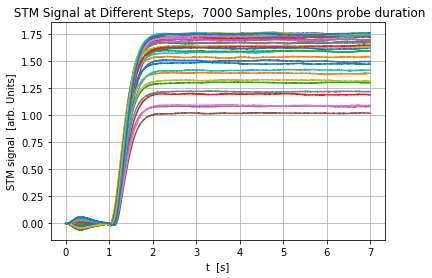

In [26]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(data)):
    plt.plot(data[i][1],data[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'STM signal  [arb. Units]')
ax.set_xlabel('t  [s]')
ax.set_title(r' STM Signal at Different Steps,  {b} Samples, 100ns probe duration'.format(b = len(data[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Sigma STM Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 100 nano,71 steps, 93 Hz no legend, .jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [27]:
time_delay = np.linspace(-200,200,31)

In [ ]:
%matplotlib inline

1.25e-10

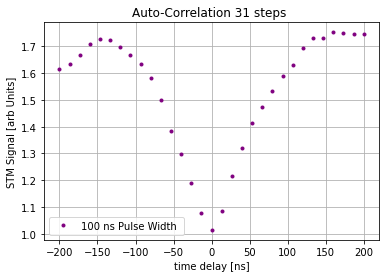

In [28]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,'.',label=r'100 ns Pulse Width ',color='purple')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'STM Signal [arb Units]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation  Sigma STM function 31 steps 100nano 93Hz length tc = {a}, sens {b}, {c}s DAQ empty cycle B.jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

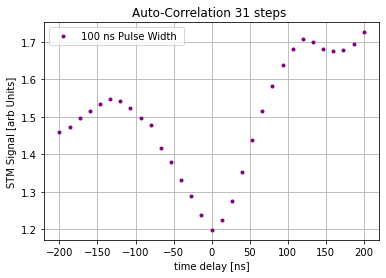

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,'.',label=r'100 ns Pulse Width ',color='purple')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'STM Signal [arb Units]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation  Sigma STM function 31 steps 100nano 93Hz length tc = {a}, sens {b}, {c}s DAQ empty cycle B.jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [29]:
normalized_data = AutoCorrelation_Normalized(averaged_data,time_delay,6,7)
np.savetxt(r'{loc}\normalized Autocorrelation.csv'.format(loc = PulseScheme_A_100nano['Measurement file Path']),normalized_data[0],delimiter=',')
normalized_data

(array([1.03400784, 1.02281028, 1.00483923, 0.98054183, 0.97273483,
        0.97623799, 0.99244538, 1.01102235, 1.03510056, 1.06977581,
        1.13059325, 1.22527848, 1.30975631, 1.42957075, 1.58026608,
        1.68228898, 1.57294085, 1.40996534, 1.30018328, 1.21639216,
        1.1664674 , 1.12340008, 1.08630471, 1.06083043, 1.02213972,
        1.00040637, 1.00300565, 0.99208384, 0.99596042, 0.99915984,
        1.00002969]),
 1.7073873702742486,
 0.0001936334993274412)

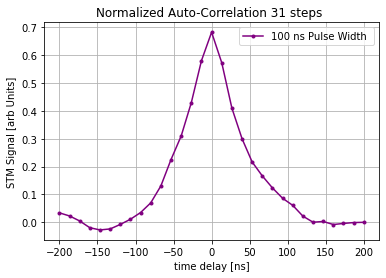

In [31]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,normalized_data[0]-1,'.-',label=r'100 ns Pulse Width ',color='purple')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'STM Signal [arb Units]')
axes.set_title('Normalized Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Normalized Autocorrelation  Sigma STM function 31 steps 100nano 93Hz length tc = {a}, sens {b}, {c}s DAQ.jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

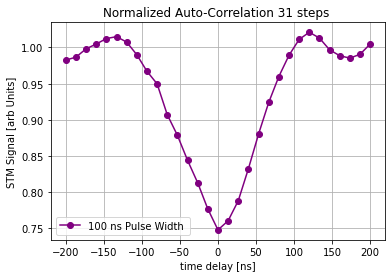

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,normalized_data[0],'.-',label=r'100 ns Pulse Width ',color='purple')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'STM Signal [arb Units]')
axes.set_title('Normalized Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Normalized Autocorrelation  Sigma STM function 31 steps 100nano 93Hz length tc = {a}, sens {b}, {c}s DAQ.jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [ ]:
100,
50,
25
10

In [67]:
import random

In [65]:
list_cycleA_100nano = list(sweeping_run_a_100nano.values())
list_cycleA_100nano

['D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_0.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_1.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_2.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_3.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_4.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_5.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_6.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_7.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_8.csv',
 

In [ ]:
random.shuffle(list_cycleA_100nano)
list_cycleA_100nano

In [66]:
list_cycleB_100nano = list(sweeping_run_b_100nano.values())
list_cycleB_100nano

['D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_0.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_1.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_2.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_3.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_4.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_5.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_6.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_7.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_8.csv',
 

In [68]:
c = list(zip(list_cycleA_100nano,list_cycleB_100nano))
random.shuffle(c)

list_cycleA_100nano, list_cycleB_100nano = zip(*c)



In [69]:
list_cycleA_100nano

('D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_64.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_59.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_37.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_39.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_31.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_1.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_18.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_57.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentA_2016_27

In [70]:
list_cycleB_100nano

('D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_64.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_59.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_37.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_39.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_31.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_1.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_18.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_57.csv',
 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\100nano\\SegmentB_2016_27